Wickrama WMTB
190680P

In [96]:
import numpy as np
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
%matplotlib inline

Q1

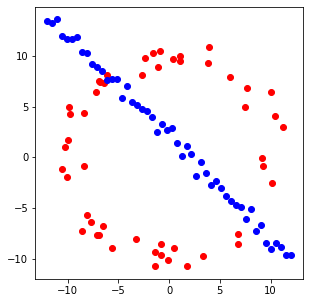

In [108]:
N = 100
half_n = N// 2
r = 10
s = r /16
t = np.random.uniform(0, 2*np.pi, half_n )

n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t),(r+n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n,1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1) , y.reshape(half_n,1)))

X = np.vstack((X_circ , X_line))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(X[:50,0],X[:50,1],'o',color='red')
ax.plot(X[50:,0],X[50:,1],'o',color='blue')
ax.set_aspect('equal')

plt.show()

In [109]:
total_points = len(x)
p = 0.99
s = 3
e = 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))

In [114]:
def findCircle(x1, y1, x2, y2, x3, y3) :
	B = (x1**2 + y1**2)*(y2-y3) + (x2**2+y2**2)*(y3-y1) + (x3**2 + y3**2)*(y1-y2)
	A = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
	C = (x1**2 + y1**2)*(x2-x3) + (x2**2 + y2**2)*(x3-x1) + (x3**2 + y3**2)*(x1-x2)
	D = (x1**2 + y1**2)*(x3*y2-x2*y3) + (x2**2 + y2**2)*(x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1 - x1*y2)
	
	H = B/(2*A)
	K = -C/(2*A)
	R = np.sqrt((B**2 + C**2 - 4*A*D)/(4*(A**2)))
	L = [H,K,R]

	return L

def PlotCircle(x0,y0,r,PX,PY):
    theta = np.linspace(0, 2*np.pi,360)
    xx , yy = x0 + r*np.cos(theta) , y0 + r*np.sin(theta)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot()
    ax.plot(xx,yy,color='green')
    ax.plot(x,y,'o')
    ax.plot(PX,PY,'o',color = 'red')
    
    ax.set_aspect('equal')
    ax.grid('on')
    plt.show()

def random_numgen(n):
    a,b,c = np.random.randint(n,size=3)
    if a==b or b==c or a==c:
        return random_numgen(n)
    else:
        return a,b,c

def DisToPoint(h,k,r,x,y):
    return (np.abs(np.sqrt((x-h)**2+(y-k)**2)-r))

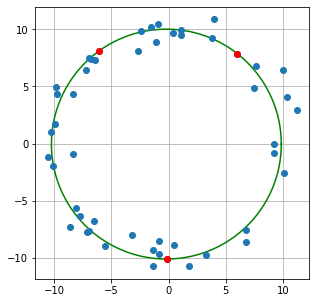

In [136]:
x=X[:50,0]
y=X[:50,1]
rnsc = []
max_inliers = 0
inlier_set = []

for i in range(total_points):
    
    p1, p2, p3 = random_numgen(total_points)
    inliers = 0
    
    x0, y0, rad = findCircle(x[p1],y[p1],x[p2],y[p2],x[p3],y[p3])
    
    inlier_set = []
    for j in range(total_points):
        d = DisToPoint(x0,y0,rad,x[j],y[j])
        if d<1:
            inliers+=1
            inlier_set.append([x[j],y[j]])

    
    outliers = total_points - inliers
    
    if inliers > max_inliers:
        rnsc = [p1,p2,p3]
        max_inliers = inliers
        rnsc_center_x, rnsc_center_y, rnsc_rad = x0, y0, rad
        rnsc_set = inlier_set
        
PlotCircle(rnsc_center_x,rnsc_center_y,rnsc_rad,[x[rnsc[0]],x[rnsc[1]],x[rnsc[2]]],[y[rnsc[0]],y[rnsc[1]],y[rnsc[2]]])

RANSAC Circle is shown above

In [140]:
ransac_x = []
ransac_y = []
for h in rnsc_set:
    ransac_x.append(h[0])
    ransac_y.append(h[1])
    
total_points = len(rnsc_set)

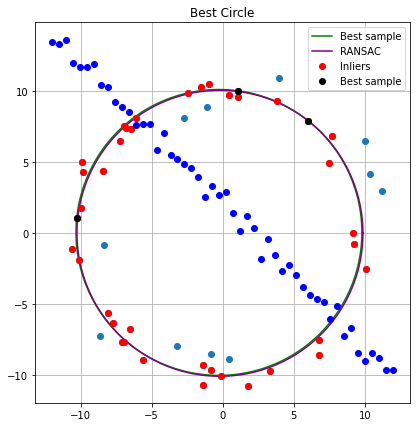

In [163]:
best = []
max_inliers = 0

for i in range(N):
    
    point1, point2, point3 = random_numgen(total_points)
    inliers = 0
    
    center_x, center_y, radius = findCircle(ransac_x[point1],ransac_y[point1],ransac_x[point2],ransac_y[point2],ransac_x[point3],ransac_y[point3])
    
    for j in range(total_points):
        d = DisToPoint(center_x,center_y,radius,ransac_x[j],ransac_y[j])
        if d<1:
            inliers+=1

    if inliers > max_inliers:
        best = [point1,point2,point3]
        max_inliers = inliers
        best_center_x, best_center_y, best_radius = center_x, center_y, radius
        

theta = np.linspace(0,2*np.pi,360)
xx , yy = best_center_x + best_radius*np.cos(theta) , best_center_y + best_radius*np.sin(theta)
rnx , rny = rnsc_center_x + rnsc_rad*np.cos(theta) , rnsc_center_y + rnsc_rad*np.sin(theta)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.plot(xx,yy,color='green',label='Best sample')
ax.plot(rnx,rny,color='purple',label='RANSAC')
ax.plot(x,y,'o')
ax.plot(ransac_x,ransac_y,'o',color='red',label='Inliers')
ax.plot(X[50:,0],X[50:,1],'o',color='blue')
ax.plot([ransac_x[best[0]],ransac_x[best[1]],ransac_x[best[2]]],[ransac_y[best[0]],ransac_y[best[1]],ransac_y[best[2]]],'o',color='black',label='Best sample')
ax.legend()
ax.set_aspect('equal')
ax.grid('on')
plt.title("Best Circle")
plt.show()

A circle fitting for the given set of points through the RANSAC algorithm is as above

Q2

In [129]:
corners = []
def click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append([x,y])
    

img = cv.imread(r"C:\Users\thilanka bandara\Downloads\images\001.jpg")
cv.imshow('image', img)
cv.setMouseCallback('image', click)
cv.waitKey(0)
cv.destroyAllWindows()

In [130]:
height, width = np.shape(img)[0],np.shape(img)[1]
zero_mat = np.array([[0],[0],[0]])

for i in range (4):
    for j in range (2):
        globals()[["x","y"][j]+"_dash_"+str(i+1)] = corners[i][j]

In [131]:
flg = cv.imread(r"C:\Users\thilanka bandara\Downloads\Flag_of_the_United_Kingdom.svg.png")
flg_height , flg_width = np.shape(flg)[0] , np.shape(flg)[1]

x1T = np.array([[0,0,1]])
x2T = np.array([[flg_width-1, 0,1]])
x3T = np.array([[flg_width-1, flg_height-1, 1]])
x4T = np.array([[0,flg_height-1,1]])

In [132]:
for i in range(4):
    a = np.concatenate((zero_mat.T,globals()["x"+str(i+1)+"T"], -globals()["y_dash_"+str(i+1)]*globals()["x"+str(i+1)+"T"]), axis=1)
    b = np.concatenate((globals()["x"+str(i+1)+"T"],zero_mat.T, -globals()["x_dash_"+str(i+1)]*globals()["x"+str(i+1)+"T"]), axis=1)
    if i==0:
        A=np.concatenate((a,b), axis=0, dtype = np.float64)
    else:
        A=np.concatenate((A,a,b), axis=0, dtype = np.float64)

In [133]:
W,V = np.linalg.eig((A.T)@A)
temph = V[:, np.argmin(W)]
H = temph.reshape((3,3))

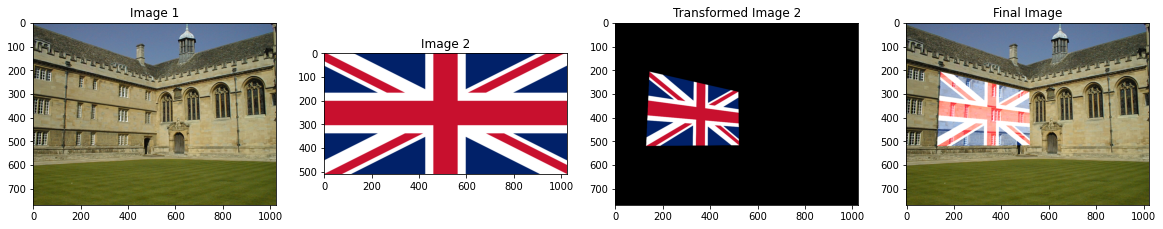

In [134]:
flg_transformed = cv.warpPerspective(flg, H,(width,height))
output = cv.add(flg_transformed,img)

fig, ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) ; ax[0].set_title("Image 1")
ax[1].imshow(cv.cvtColor(flg, cv.COLOR_BGR2RGB)) ; ax[1].set_title("Image 2")
ax[2].imshow(cv.cvtColor(flg_transformed, cv.COLOR_BGR2RGB)) ; ax[2].set_title("Transformed Image 2")
ax[3].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB)) ; ax[3].set_title("Final Image")
plt.show()

Q3

In [176]:
img1_original = cv.imread(r"C:\Users\thilanka bandara\Downloads\New folder (4)\img1.ppm")
img5_original = cv.imread(r"C:\Users\thilanka bandara\Downloads\New folder (4)\img5.ppm")

img1 = cv.cvtColor(img1_original, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(cv.imread(r"C:\Users\thilanka bandara\Downloads\New folder (4)\img2.ppm"), cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(cv.imread(r"C:\Users\thilanka bandara\Downloads\New folder (4)\img3.ppm"), cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(cv.imread(r"C:\Users\thilanka bandara\Downloads\New folder (4)\img4.ppm"), cv.COLOR_BGR2GRAY)
img5 = cv.cvtColor(img5_original, cv.COLOR_BGR2GRAY)

images = [img1, img2, img3, img4, img5]

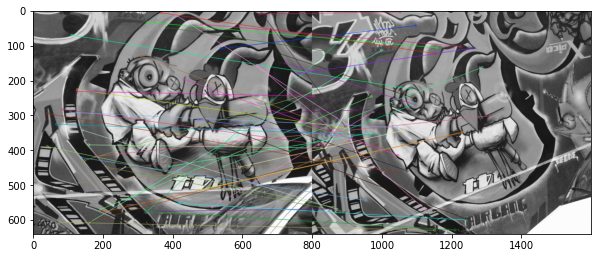

In [177]:
sift = cv.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_5, descriptors_5 = sift.detectAndCompute(img5,None)
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_5)
matches = sorted(matches, key = lambda x:x.distance)
Matched = cv.drawMatches(img1, keypoints_1, img2, keypoints_5, matches[:50], img5, flags=2)
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(Matched)

In [206]:
def randN(n, t):
    l = np.random.randint(n, size=t)
    m = np.zeros(np.shape(l))
    
    for i in range(len(l)): m[i] = np.sum(l==l[i])
    if np.sum(m) == len(m): return l
    else: return randN(n,t)

def computeHomo(P1, P2):
    
    x1, y1, x2, y2, x3, y3, x4, y4 = P2[0], P2[1], P2[2], P2[3], P2[4], P2[5], P2[6], P2[7]
    x1T, x2T, x3T, x4T = P1[0], P1[1], P1[2], P1[3]
    zero_matrix = np.array([[0],[0],[0]])
    
    a = np.concatenate((zero_matrix.T,x1T, -y1*x1T), axis=1)
    b = np.concatenate((x1T,zero_matrix.T, -x1*x1T), axis=1)

    c = np.concatenate((zero_matrix.T,x2T, -y2*x2T), axis=1)
    d = np.concatenate((x2T,zero_matrix.T, -x2*x2T), axis=1)

    e = np.concatenate((zero_matrix.T,x3T, -y3*x3T), axis=1)
    f = np.concatenate((x3T,zero_matrix.T, -x3*x3T), axis=1)

    g = np.concatenate((zero_matrix.T,x4T, -y4*x4T), axis=1)
    h = np.concatenate((x4T,zero_matrix.T, -x4*x4T), axis=1)

    A = np.concatenate((a,b,c,d,e,f,g,h), axis=0, dtype = np.float64)


    A_transpose_times_A = (A.T)@A
    W,V = np.linalg.eig(A_transpose_times_A)
    temph = V[:, np.argmin(W)]
    H = temph.reshape((3,3))
    return H    

In [208]:
p,s,e = 0.99, 4, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))

H_values = []
for t in range(4):
    sift = cv.xfeatures2d.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(images[t],None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(images[t+1],None)

    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    list_kp1 = [keypoints_1[mat.queryIdx].pt for mat in matches] 
    list_kp2 = [keypoints_2[mat.trainIdx].pt for mat in matches]

    threshold, best_inliers, best_H = 2, 0, 0

    for k in range(N):
        four_random_points = randN(len(list_kp1)-1,4)

        fromPoints = []
        for i in range(4): fromPoints.append(np.array([[list_kp1[four_random_points[i]][0], list_kp1[four_random_points[i]][1], 1]]))

        toPoints = []
        for j in range(4): 
            toPoints.append(list_kp2[four_random_points[j]][0])
            toPoints.append(list_kp2[four_random_points[j]][1])
        
        H = computeHomo(fromPoints, toPoints)
        
        inliers = 0
        for i in range(len(list_kp1)):
            X = [list_kp1[i][0], list_kp1[i][1], 1]
            hX = H@X
            hX /= hX[-1]
            error = np.sqrt(np.power(hX[0]-list_kp2[i][0],2) + np.power(hX[1]-list_kp2[i][1],2))
            if error < threshold: inliers+=1
        
        if inliers > best_inliers:
            best_inliers = inliers
            best_H = H

    H_values.append(best_H)

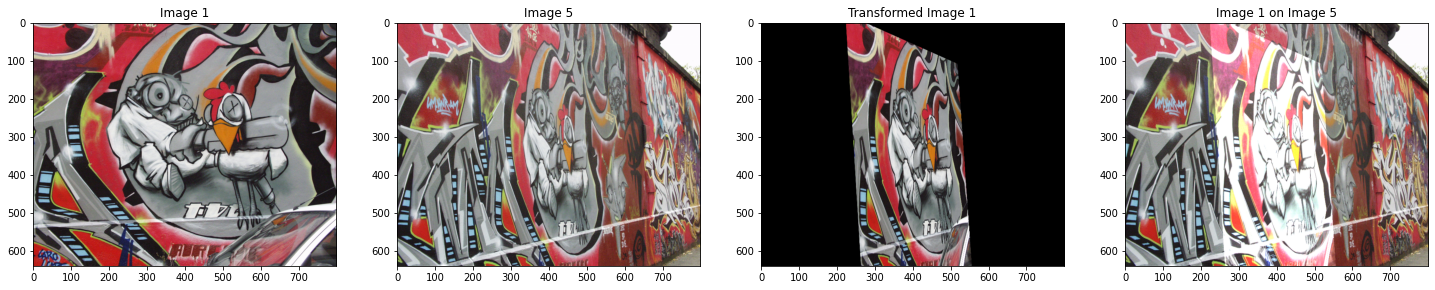

In [209]:
H_1_to_5 = H_values[3] @ H_values[2] @ H_values[1] @ H_values[0]
H_1_to_5 /= H_1_to_5[-1][-1]

transformed = cv.warpPerspective(img1_original, H_1_to_5 ,(np.shape(img5_original)[1] ,np.shape(img5_original)[0]))

fig, ax = plt.subplots(1,4,figsize=(25,25))
ax[0].imshow(cv.cvtColor(img1_original,cv.COLOR_BGR2RGB)) ; ax[0].set_title("Image 1")
ax[1].imshow(cv.cvtColor(img5_original,cv.COLOR_BGR2RGB)) ; ax[1].set_title("Image 5")
ax[2].imshow(cv.cvtColor(transformed, cv.COLOR_BGR2RGB)) ; ax[2].set_title("Transformed Image 1")
output = cv.add(img5_original,transformed)
ax[3].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB)) ;  ax[3].set_title("Image 1 on Image 5")
plt.show()

The number of better sift feature matches between image 1 and image 5 were not sufficient due to the significant perspective difference between the images. Therefore, homographies between consecutive images were computed via the RANSAC algorithm and they were multiplied together to obtain the homography from image 1 to 5.